# AskReddit Troll Question Detection Challenge

## Imports

In [460]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from wordcloud import WordCloud

In [461]:
# To use data that is Lemmatized
# train_df = pd.read_csv("processed_train_data.csv")

# To use data that is not Lemmatized
train_df = pd.read_csv("train.csv")
train_df.head()
train_df.drop(['qid'],axis=1)

,question_text,target
0,What is the role of Lua in Civ4?,0
1,What are important chapters in Kannada for 10 ...,0
2,Do musicians get royalties from YouTube?,0
3,What is the difference between Scaling Social ...,0
4,Why do elevators go super slow right before th...,0
...,...,...
653056,Which coaching centre is best in Delhi for IAS...,0
653057,Is their any API to check CIBIL score and down...,0
653058,"In paranormal shows, why do spirits talk to me...",0
653059,How does Josh Gordon have such well developed ...,0


## Preprocessing

### Checking Duplicated and Null

In [462]:
train_df.dropna(axis=1)
train_df.drop_duplicates(inplace=True)

### Dropping the qid

In [463]:
train_df.head()

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0


### Data Balance Check

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0


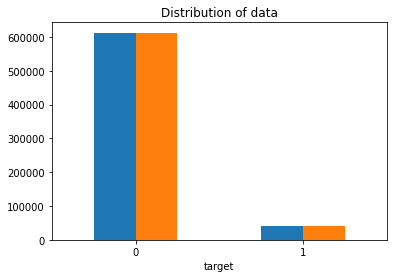

In [464]:
import matplotlib.pyplot as plt

# Plotting the distribution for dataset.
ax = train_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)

sentences = train_df['question_text'].values.astype('U')
sentences = sentences.tolist()
train_df.head()

Hence, we need to balance the data some how.

- As the data is in string so we cannot do balancing of data right now.
- We cannot duplicate the data here as in that case we will affect the vectorisation of the base data (We tried but that didn't work well).
- Now we will first vectorize the data and then use balancing data techniques.

### Splitting Data

In [465]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(train_df.drop(['target'],axis=1),train_df['target'] , train_size=0.6)

In [466]:
majority_class = train_X[train_y==0]
minority_class = train_X[train_y==1]

# print(minority_class[0:10])

majority_class = majority_class['question_text'].values.astype('U')
majority_class = majority_class.tolist()

minority_class = minority_class['question_text'].values.astype('U')
minority_class = minority_class.tolist()

### Balancing Data

In [467]:
# temp = []
# for i in range(2):
#     temp = temp+minority_class

# minority_class = temp

fraction = 0.56
majority_class = majority_class[0:int(len(majority_class)*fraction)]

### Word Cloud Charts

In [468]:
# plt.figure(figsize = (10,10))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(majority_class))
# plt.imshow(wc)

In [469]:
# plt.figure(figsize = (10,10))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(minority_class))
# plt.imshow(wc)

### Making the vocabulary

In [470]:
words_maj = []

for sentence in majority_class:
    for word in sentence.split():
        words_maj.append(word)

In [471]:
words_min = []

for sentence in minority_class:
    for word in sentence.split():
        words_min.append(word)

In [472]:
import collections

frequency_maj = collections.Counter(words_maj)
frequency_maj = dict(frequency_maj)
item_to_be_deleted = []
for i in frequency_maj:
    if(frequency_maj[i]<=0):
        item_to_be_deleted.append(i)
    # if(frequency_maj[i] == 20):
    #     print(i)

print(len(frequency_maj))
print(len(item_to_be_deleted))
print(len(frequency_maj)-len(item_to_be_deleted))


for i in item_to_be_deleted:
    frequency_maj.pop(i)

155485
0
155485


In [473]:
import collections

frequency_min = collections.Counter(words_min)
frequency_min = dict(frequency_min)
item_to_be_deleted = []
# frequency_min.sort()
for i in frequency_min:
    if(frequency_min[i]<=0):
        item_to_be_deleted.append(i)
    # if(frequency_min[i] == 10):
    #     print(i)

print(len(frequency_min))
print(len(item_to_be_deleted))
print(len(frequency_min)-len(item_to_be_deleted))

for i in item_to_be_deleted:
    frequency_min.pop(i)

41448
0
41448


In [474]:
vocab_maj = []
for i in frequency_maj:
    vocab_maj.append(i)

vocab_min = []
for i in frequency_min:
    vocab_min.append(i)

# print(vocab)

In [475]:
y1_zeros = []
for i in range(len(majority_class)):
    y1_zeros.append(0)
y2_ones = []
for i in range(len(minority_class)):
    y2_ones.append(1)
train_X = majority_class+minority_class
train_y = y1_zeros+y2_ones

### Spilting Data

[205833  24276]


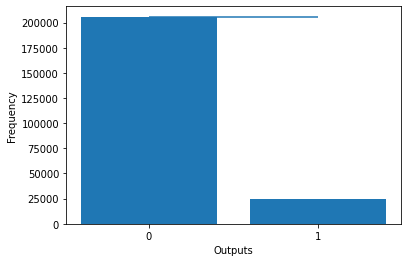

In [476]:
# Plotting the distribution for dataset.
train_y_list = train_y
train_y_list = [str(int(i)) for i in train_y_list]

value, freq = np.unique(train_y_list,return_counts=True)
print(freq)

plt.bar(value,freq,align='center')
plt.xlabel('Outputs')
plt.ylabel('Frequency')
for i in range(len(freq)):
    plt.hlines(freq[i],1,value[i])
plt.show()

## Vectoring Words

In [477]:
vocab = vocab_maj+vocab_min
vocab = set(vocab)

print(len(vocab))

test_X = test_X['question_text'].values.astype('U')
test_X = test_X.tolist()

170617


### Bag Of Words

In [478]:
cv = CountVectorizer(vocabulary=vocab,lowercase=False,ngram_range=(1,4))
cv.fit(train_X)
X1_train = cv.transform(train_X)
X1_test = cv.transform(test_X)

In [479]:
X1_train = X1_train.astype(float)
X1_test = X1_test.astype(float)

### TF IDF

In [480]:
cv = TfidfVectorizer(vocabulary=vocab,lowercase=False,stop_words='english')
cv.fit(train_X)
X2_train = cv.transform(train_X)
X2_test = cv.transform(test_X)

In [481]:
X2_train = X2_train.astype(float)
X2_test = X2_test.astype(float)

## Model generation

### For data genrated by "Bag of words" method  

In [482]:
lreg1 = LogisticRegression(solver='liblinear')
lreg1.fit(X1_train,train_y)

LogisticRegression(solver='liblinear')

### For data generated by "TD IDF" method

In [483]:
lreg2 = LogisticRegression(solver='liblinear')
lreg2.fit(X2_train,train_y)

LogisticRegression(solver='liblinear')

### Confusion Matrix

In [484]:
# Compute and plot the Confusion matrix
def confusion_matrix_for_data(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Predict for X1, Y1

In [485]:
train_yhat1 = lreg1.predict_proba(X1_train)
test_yhat1 = lreg1.predict_proba(X1_test)

# print(X1_test.shape)

print("training score = ", roc_auc_score(train_y, train_yhat1[:,1]))
print("test score = ", roc_auc_score(test_y,test_yhat1[:,1]))

max = 0
max_th = 0.35
threshold = 0.35

for i in range(200):
    threshold += 0.0001
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    comp = f1_score(test_y, test_output1)
    if comp>max:
        max = comp
        max_th = threshold

print(fraction)
print(max_th)
print(max)

#0.6
#0.32849999999999907
#0.6011527868480081

# 0.58
# 0.3387999999999995
# 0.6035192600530146

# 0.56
# 0.35199999999999976
# 0.6062833840675435

# 0.55
# 0.33549999999999985
# 0.6070404897732017

# 0.54
# 0.3605999999999999
# 0.6041045729370689

# 0.53
# 0.3420999999999991
# 0.6037390943082676

#0.5
#0.3399999999999978
#0.6051198699715562

training score =  0.9767623123474041
test score =  0.9420597062013721
0.56
0.35389999999999955
0.6016590389016019


In [486]:
print(threshold)
print("training score = ", f1_score(train_y, train_output1))
print(classification_report(train_y, train_output1),'\n')

print("testing score = ", f1_score(test_y, test_output1))
print(classification_report(test_y, test_output1),'\n')

0.3699999999999978
training score =  0.7843588991747998
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    205833
           1       0.80      0.77      0.78     24276

    accuracy                           0.96    230109
   macro avg       0.89      0.87      0.88    230109
weighted avg       0.95      0.96      0.95    230109
 

testing score =  0.6009949669798971
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    245096
           1       0.57      0.64      0.60     16129

    accuracy                           0.95    261225
   macro avg       0.77      0.80      0.79    261225
weighted avg       0.95      0.95      0.95    261225
 



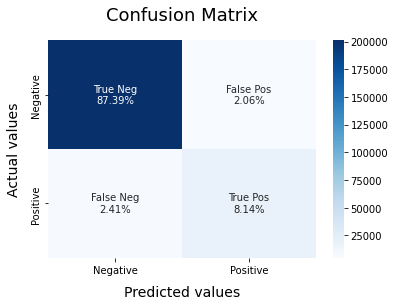

In [487]:
confusion_matrix_for_data(train_y, train_output1)

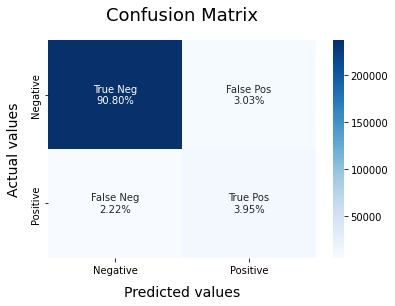

In [488]:
confusion_matrix_for_data(test_y, test_output1)

### Predict for X2, Y2

In [489]:
train_yhat2 = lreg2.predict_proba(X2_train)
test_yhat2 = lreg2.predict_proba(X2_test)

# print("training score = ", roc_auc_score(train_y2, train_yhat2[:,1]))
# print("test score = ", roc_auc_score(test_y2,test_yhat2[:,1]))

train_output2 = (train_yhat2[:,1] > threshold).astype(int)
test_output2 = (test_yhat2[:,1] > threshold).astype(int)

test_y = test_y.astype(int)

In [490]:
print("training score = ", f1_score(train_y, train_output2))
print(classification_report(train_y, train_output2),'\n')

print("testing score = ", f1_score(test_y, test_output2))
print(classification_report(test_y, test_output2))

training score =  0.7050950570342205
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    205833
           1       0.75      0.67      0.71     24276

    accuracy                           0.94    230109
   macro avg       0.85      0.82      0.84    230109
weighted avg       0.94      0.94      0.94    230109
 

testing score =  0.5807777049961294
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    245096
           1       0.56      0.60      0.58     16129

    accuracy                           0.95    261225
   macro avg       0.77      0.79      0.78    261225
weighted avg       0.95      0.95      0.95    261225



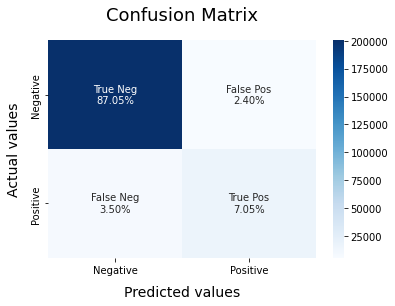

In [491]:
confusion_matrix_for_data(train_y, train_output2)

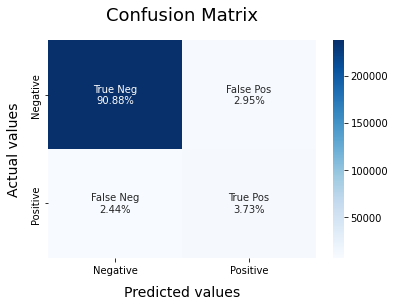

In [492]:
confusion_matrix_for_data(test_y, test_output2)